In [1]:
import os
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split as tts

#set up
direc = "emails/"
files = os.listdir(direc)
emails = [direc + email for email in files]
ds_store = "emails/.DS_Store"
if ds_store in emails: emails.remove(ds_store)

# ------ make dictionary of all words in corpus ------  
print(len(emails))
words = []
count = len(emails)
for email in emails:
	f = open(email)
	blob = f.read()
	words += blob.split(" ")
	#print(count)
	count -= 1

for i in range(len(words)):
	if not words[i].isalpha():
		words[i] = ""

dictionary = Counter(words)
del dictionary[""]
dictionary = dictionary.most_common(3000) 

# -----------------------------------------------------

# -------- Make Data set ------------------------------

def make_dataset(dictionary):

	#set up variables
	feature_set = []
	labels = []
	c = len(emails) #simple counter

	#go through all documents
	for email in emails:
		#print(c)
		data = []
		f = open(email)

		#make the feature vector for the document
		words = f.read().split(" ")
		for entry in dictionary:
			data.append(words.count(entry[0]))
		feature_set.append(data)

		# label the feature
		if "ham" in email:
			labels.append(0)
		else:
			labels.append(1)
		c-=1

	return feature_set, labels


features, labels = make_dataset(dictionary)

#check to see that the feature set matches the number of labels
print(len(features))
print(len(labels))

5172
5172
5172


In [44]:
# from pandas import DataFrame
# df = DataFrame.from_records(features)
# we dont need those two lines above this, but if you wanted to put the data into a pandas dataframe it's as simple as that.
x_train, x_test, y_train, y_test = tts(features, labels, test_size = 0.2, random_state=42) #split data set. We should look at stratifying this


In [45]:
from sklearn.metrics import accuracy_score
clf = MultinomialNB()
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
accuracy_score(y_test, preds)

0.9391304347826087

In [46]:
from sklearn import metrics
metrics.f1_score(y_test, preds)

0.9007874015748032

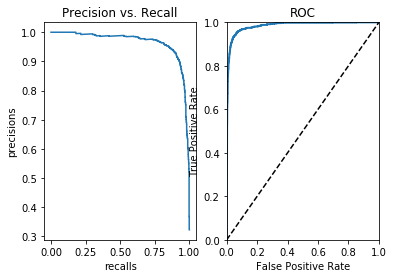

PvsR area under curve:: 0.9660378971569941
Precision: 0.9324561403508772
Recall: 0.8917785234899329
F1 Score: 0.911663807890223

ROC area under curve: 0.9845348446348607


In [47]:
# plot PvsR and ROC curves
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

clf = SGDClassifier(random_state=42)
clf.fit(x_train, y_train)
y_scores = cross_val_predict(clf, x_train, y_train, cv=3, method="decision_function") 
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
#plt.show()

# Precision VS Recall grraph. Perfect would be stuck to the top right corner
def plot_PvsR_curve(precisions, recalls):
    plt.subplot(1, 2, 1)
    plt.title("Precision vs. Recall")
    plt.plot(recalls, precisions)
    plt.xlabel('recalls')
    plt.ylabel('precisions')
plot_PvsR_curve(precisions, recalls)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.subplot(1, 2, 2)
    plt.title("ROC")
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

#print area under curve for PvsR
from sklearn.metrics import auc
auc = auc(recalls, precisions)
print("PvsR area under curve:: " + str(auc))

# get predictions
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train, cv=3)
#score the algorithm on PvsR
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
print("Precision: " + str(precision_score(y_train, y_train_pred))) # == TP / (TP + FP) 
print("Recall: " + str(recall_score(y_train, y_train_pred))) # == TP / (TP + FN)
print("F1 Score: " + str(f1_score(y_train, y_train_pred))) # combined precision and recall into one metric
print("")

# quantify this curve in one number by calculating the area under the curve. Perfect classifier would be = 1
from sklearn.metrics import roc_auc_score
print("ROC area under curve: " + str(roc_auc_score(y_train, y_scores)))


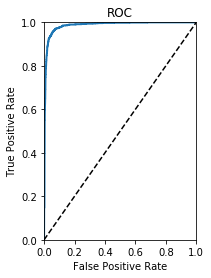

0.9861036576150649


In [22]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.subplot(1, 2, 2)
    plt.title("ROC")
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

# quantify this curve in one number by calculating the area under the curve. Perfect classifier would be = 1
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, y_scores))

In [34]:
from pandas import DataFrame
df = DataFrame.from_records(features)
